In [2]:
import numpy as np
import pandas as pd                              # importing the libraries that are required for data cleaning and eda.
import matplotlib.pyplot as plt                  # Also, for the datapoint visualisation purposes
import seaborn as sns

In [3]:
ckd_csv_file_path = "/content/kidney_disease.csv"

ckd_df = pd.read_csv(ckd_csv_file_path)

print(ckd_df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [ ]:
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Drooping Unwanted columns & Dealing Missing Values

In [ ]:
# for removing unwanted colums in datset which are not useful for classification tasks in the model
ckd_df = ckd_df.drop('id',axis=1)
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
ckd_df.info()   # after dropping unwanted columns using drop method
# from above the int64(1) is removed in output as result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
ckd_missing_percentage = (ckd_df.isnull().sum() / len(ckd_df)) * 100
print("CKD Missing Percentage in each column:\n", ckd_missing_percentage)

CKD Missing Percentage in each column:
 age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64


***Data Formatting***

In [ ]:
column_data_types = {
    'age': int,
    'bp': int,
    'sg': float,
    'al': int,
    'su': int,
    'rbc': str,
    'pc': str,
    'pcc': str,
    'ba': str,
    'bgr': int,
    'bu': int,
    'sc': float,
    'sod': int,
    'pot': float,
    'hemo': float,
    'pcv': int,
    'wc': int,
    'rc': float,
    'htn': str,
    'dm': str,
    'cad': str,
    'appet': str,
    'pe': str,
    'ane': str,
    'classification': str
}

for col, dtype in column_data_types.items():
  if dtype == int:
    ckd_df[col] = ckd_df[col].replace([np.inf, -np.inf], np.nan)
    ckd_df[col] = pd.to_numeric(ckd_df[col], errors='coerce')
    ckd_df[col] = ckd_df[col].fillna(-1).astype(dtype)


  # ckd_df[col] = ckd_df[col].astype(dtype)

In [ ]:
columns_categorically = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Performing extraction of columns which are categorical from the datframe.
col_categorically_df = ckd_df[columns_categorically]

# Performing extraction of columns which are numerical from the datframe. i.e.., the ones that are remaining after categorical columns
col_numerically_df = ckd_df.drop(columns_categorically, axis =1)

In [ ]:
col_numerically_df         # checking what are the numerical columns in the dataset.

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48,80,1.020,1,0,121,36,1.2,-1,NaN,15.4,44,7800,5
1,7,50,1.020,4,0,-1,18,0.8,-1,NaN,11.3,38,6000,-1
2,62,80,1.010,2,3,423,53,1.8,-1,NaN,9.6,31,7500,-1
3,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3
4,51,80,1.010,2,0,106,26,1.4,-1,NaN,11.6,35,7300,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,140,49,0.5,150,4.9,15.7,47,6700,4
396,42,70,1.025,0,0,75,31,1.2,141,3.5,16.5,54,7800,6
397,12,80,1.020,0,0,100,26,0.6,137,4.4,15.8,49,6600,5
398,17,60,1.025,0,0,114,50,1.0,135,4.9,14.2,51,7200,5


Understanding the distribution of values in each categorical column

In [ ]:
for col in col_categorically_df.columns:
  c_unique_values = col_categorically_df[col].unique()
  print(f"Unique values in '{col}': {c_unique_values}")


# below is data cleaning part

value_mapping = {
    '\tno': 'no',
    ' yes': 'yes',
    'notckd': 'no',
    'ckd\t':'ckd',
    '\tyes': 'yes'                                    # know why we need to write inplace=True?????
}                                         # if we dont put it it will not get changed in original dataframe


col_categorically_df.replace(value_mapping, inplace=True)



Unique values in 'rbc': [nan 'normal' 'abnormal']
Unique values in 'pc': ['normal' 'abnormal' nan]
Unique values in 'pcc': ['notpresent' 'present' nan]
Unique values in 'ba': ['notpresent' 'present' nan]
Unique values in 'htn': ['yes' 'no' nan]
Unique values in 'dm': ['yes' 'no' nan]
Unique values in 'cad': ['no' 'yes' nan]
Unique values in 'appet': ['good' 'poor' nan]
Unique values in 'pe': ['no' 'yes' nan]
Unique values in 'ane': ['no' 'yes' nan]
Unique values in 'classification': ['ckd' 'no']


<ipython-input-20-f28dd53b34c0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_categorically_df.replace(value_mapping, inplace=True)


In [ ]:
for col in col_numerically_df.columns:
  n_unique_values = col_numerically_df[col].unique()
  print(f"Unique values in '{col}': {n_unique_values}")


Unique values in 'age': [48  7 62 51 60 68 24 52 53 50 63 40 47 61 21 42 75 69 -1 73 70 65 76 72
 82 46 45 35 54 11 59 67 15 55 44 26 64 56  5 74 38 58 71 34 17 12 43 41
 57  8 39 66 81 14 27 83 30  4  3  6 32 80 49 90 78 19  2 33 36 37 23 25
 20 29 28 22 79]
Unique values in 'bp': [ 80  50  70  90  -1 100  60 110 140 180 120]
Unique values in 'sg': [1.02  1.01  1.005 1.015   nan 1.025]
Unique values in 'al': [ 1  4  2  3  0 -1  5]
Unique values in 'su': [ 0  3  4  1 -1  2  5]
Unique values in 'bgr': [121  -1 423 117 106  74 100 410 138  70 490 380 208  98 157  76  99 114
 263 173  95 108 156 264 123  93 107 159 140 171 270  92 137 204  79 207
 124 144  91 162 246 253 141 182  86 150 146 425 112 250 360 163 129 133
 102 158 165 132 104 127 415 169 251 109 280 210 219 295  94 172 101 298
 153  88 226 143 115  89 297 233 294 323 125  90 308 118 224 128 122 214
 213 268 256  84 105 288 139  78 273 242 424 303 148 160 192 307 220 447
 309  22 111 261 215 234 131 352  80 239 110 130 184 252

In [ ]:
print("Unique values in 'classification' before replacement:")
print(col_categorically_df['classification'].unique())

target_mapping = {
    'ckd': 0,
    'notckd': 1
}

col_categorically_df['classification'].replace(target_mapping, inplace=True)

                        # Another way:
                             # c_unique_values = col_categorically_df['classification'].unique()
                             # print(f"Unique values in 'classification': {c_unique_values}")


print("\nUnique values in 'classification' after replacemnt:")
print(col_categorically_df['classification'].unique())

print("\nFirst few rows of dataframe,,head method:")
print(col_categorically_df.head())
ckd_df.head()

Unique values in 'classification' before replacement:
['ckd' 'no']

Unique values in 'classification' after replacemnt:
[0 'no']

First few rows of dataframe,,head method:
      rbc        pc         pcc          ba  htn   dm cad appet   pe  ane  \
0     NaN    normal  notpresent  notpresent  yes  yes  no  good   no   no   
1     NaN    normal  notpresent  notpresent   no   no  no  good   no   no   
2  normal    normal  notpresent  notpresent   no  yes  no  poor   no  yes   
3  normal  abnormal     present  notpresent  yes   no  no  poor  yes  yes   
4  normal    normal  notpresent  notpresent   no   no  no  good   no   no   

  classification  
0              0  
1              0  
2              0  
3              0  
4              0  


<ipython-input-24-28ea73007d8f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_categorically_df['classification'].replace(target_mapping, inplace=True)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,-1,...,38,6000,-1,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,-1,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4,no,no,no,good,no,no,ckd


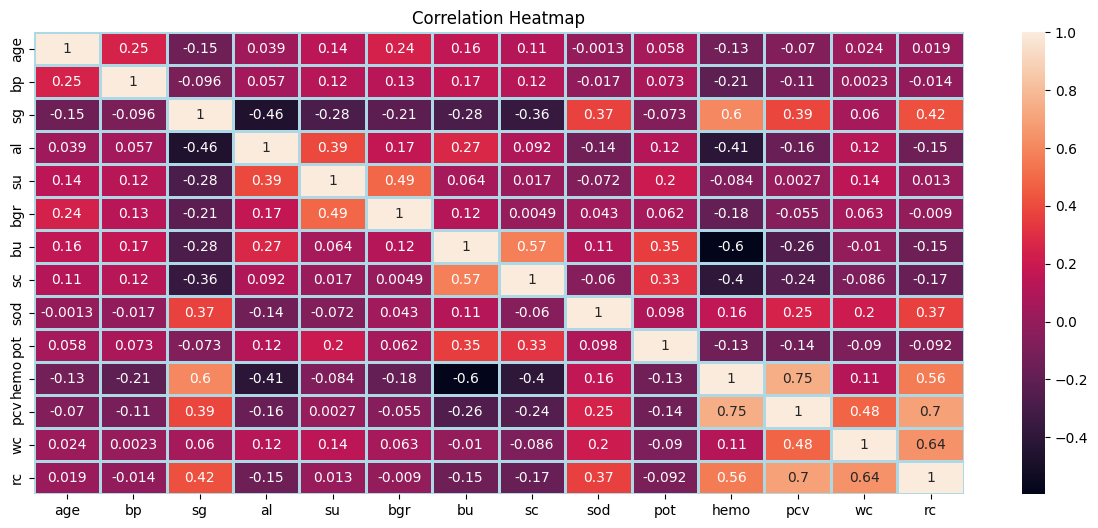

In [ ]:
correlation_matrix = col_numerically_df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix,annot=True,linewidth=2,linecolor='lightblue')
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1500x800 with 0 Axes>

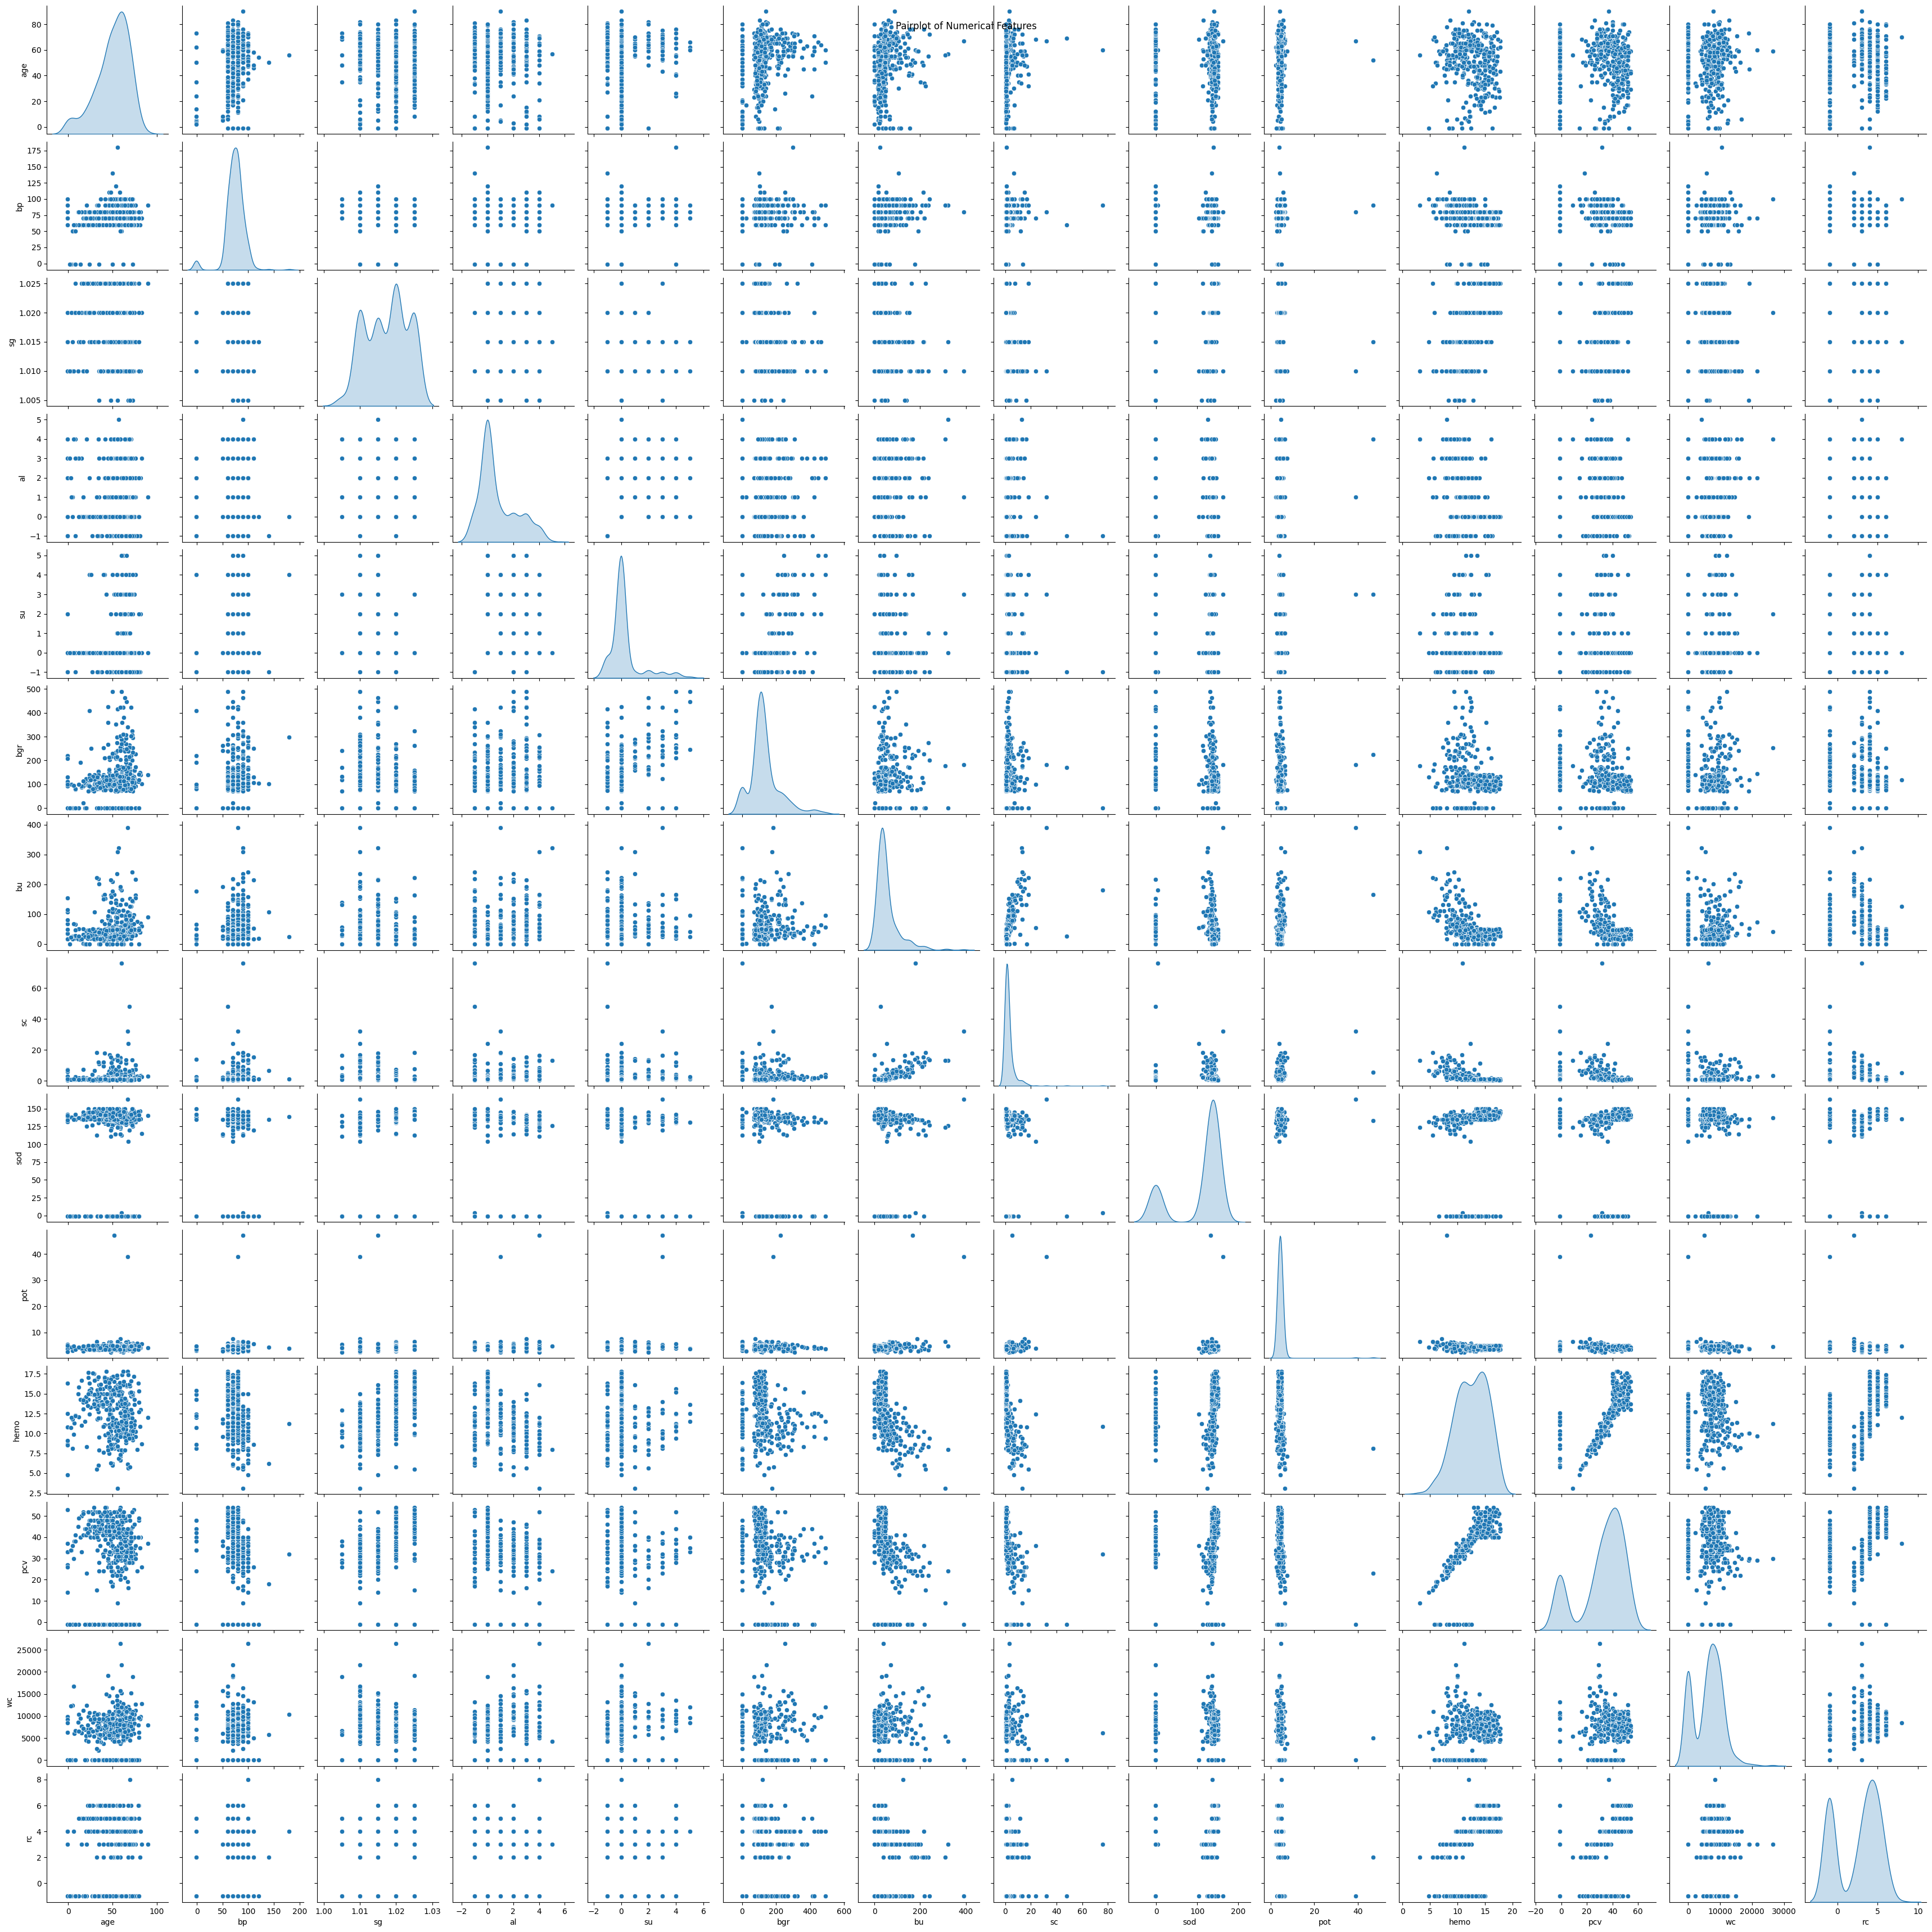

In [ ]:
# Pairplot for numerical features
plt.figure(figsize=(15, 8))
sns.pairplot(col_numerically_df, diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features")
plt.show()

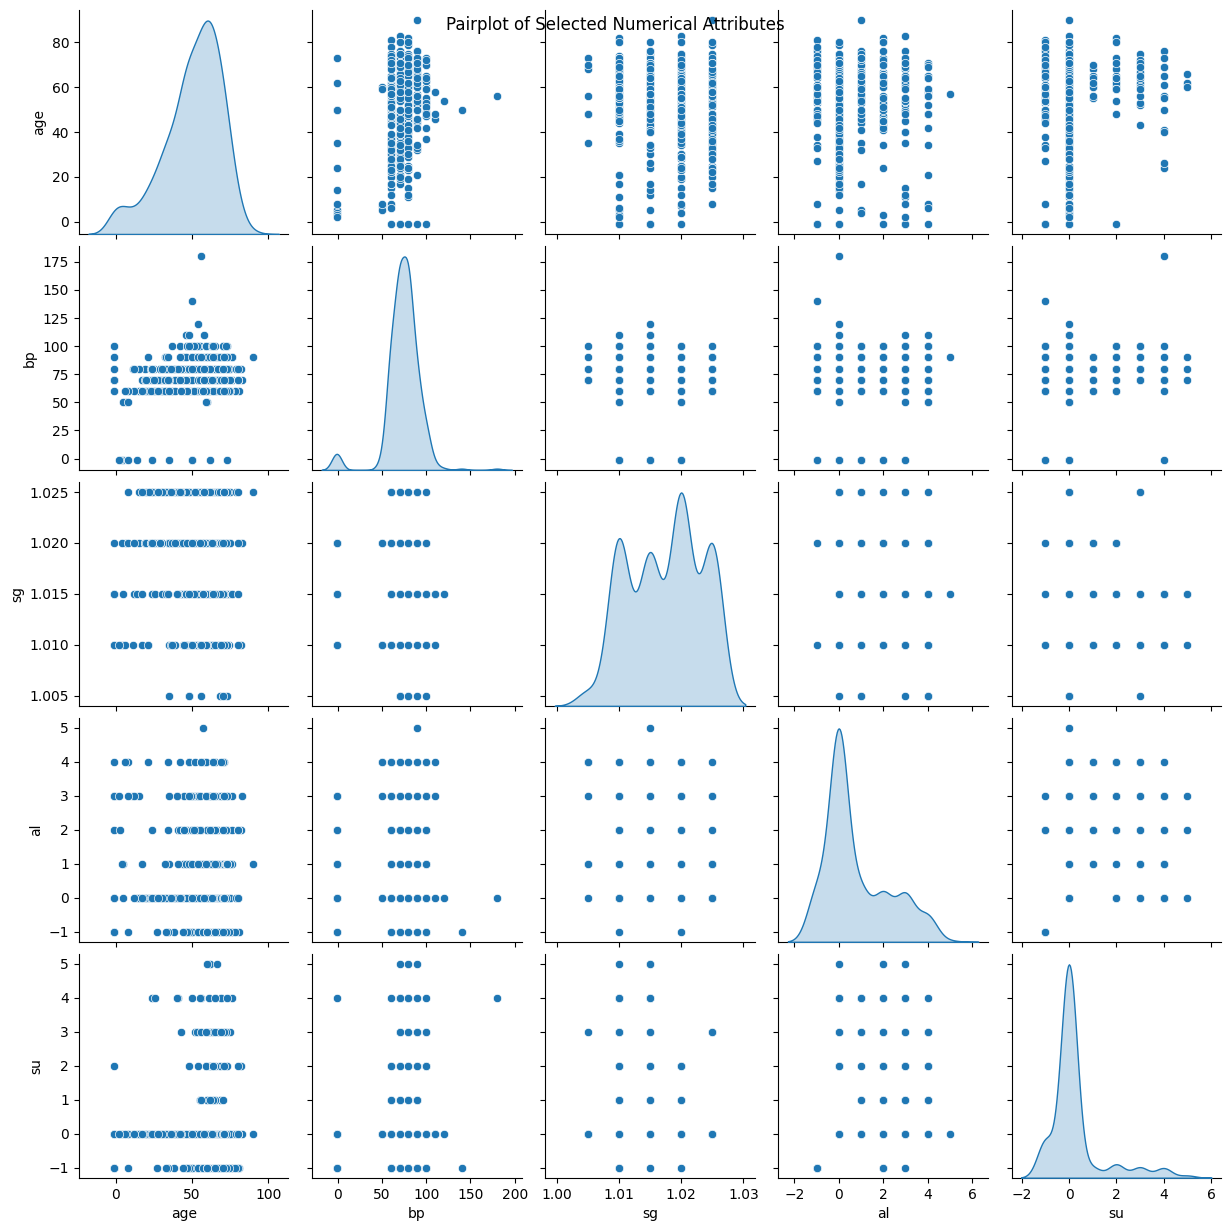

In [ ]:
# Selecting a few main numerical attributes for the pairplot
selected_numerical_attributes = ['age', 'bp', 'sg', 'al', 'su']

# Pairplot for selected numerical attributes
sns.pairplot(col_numerically_df[selected_numerical_attributes], diag_kind='kde')
plt.suptitle("Pairplot of Selected Numerical Attributes")
plt.show()

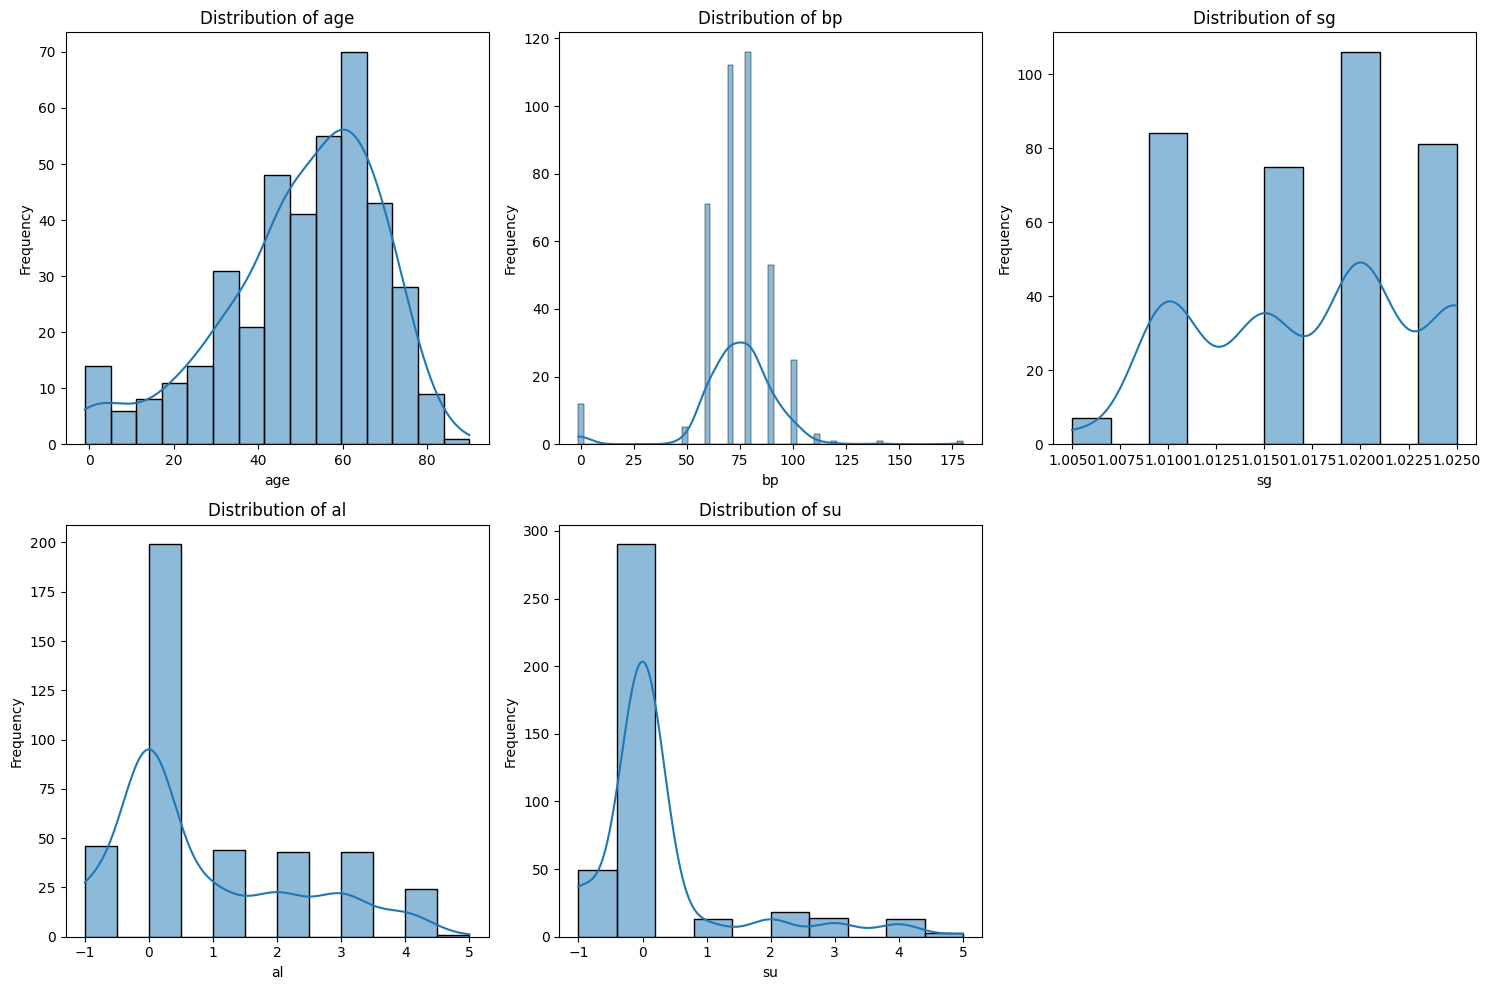

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected numerical attributes for the distplots
selected_numerical_attributes = ['age', 'bp', 'sg', 'al', 'su']

# Create subplots for distplots
plt.figure(figsize=(15, 10))
for i, attribute in enumerate(selected_numerical_attributes, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(col_numerically_df[attribute], kde=True)
    plt.title(f"Distribution of {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


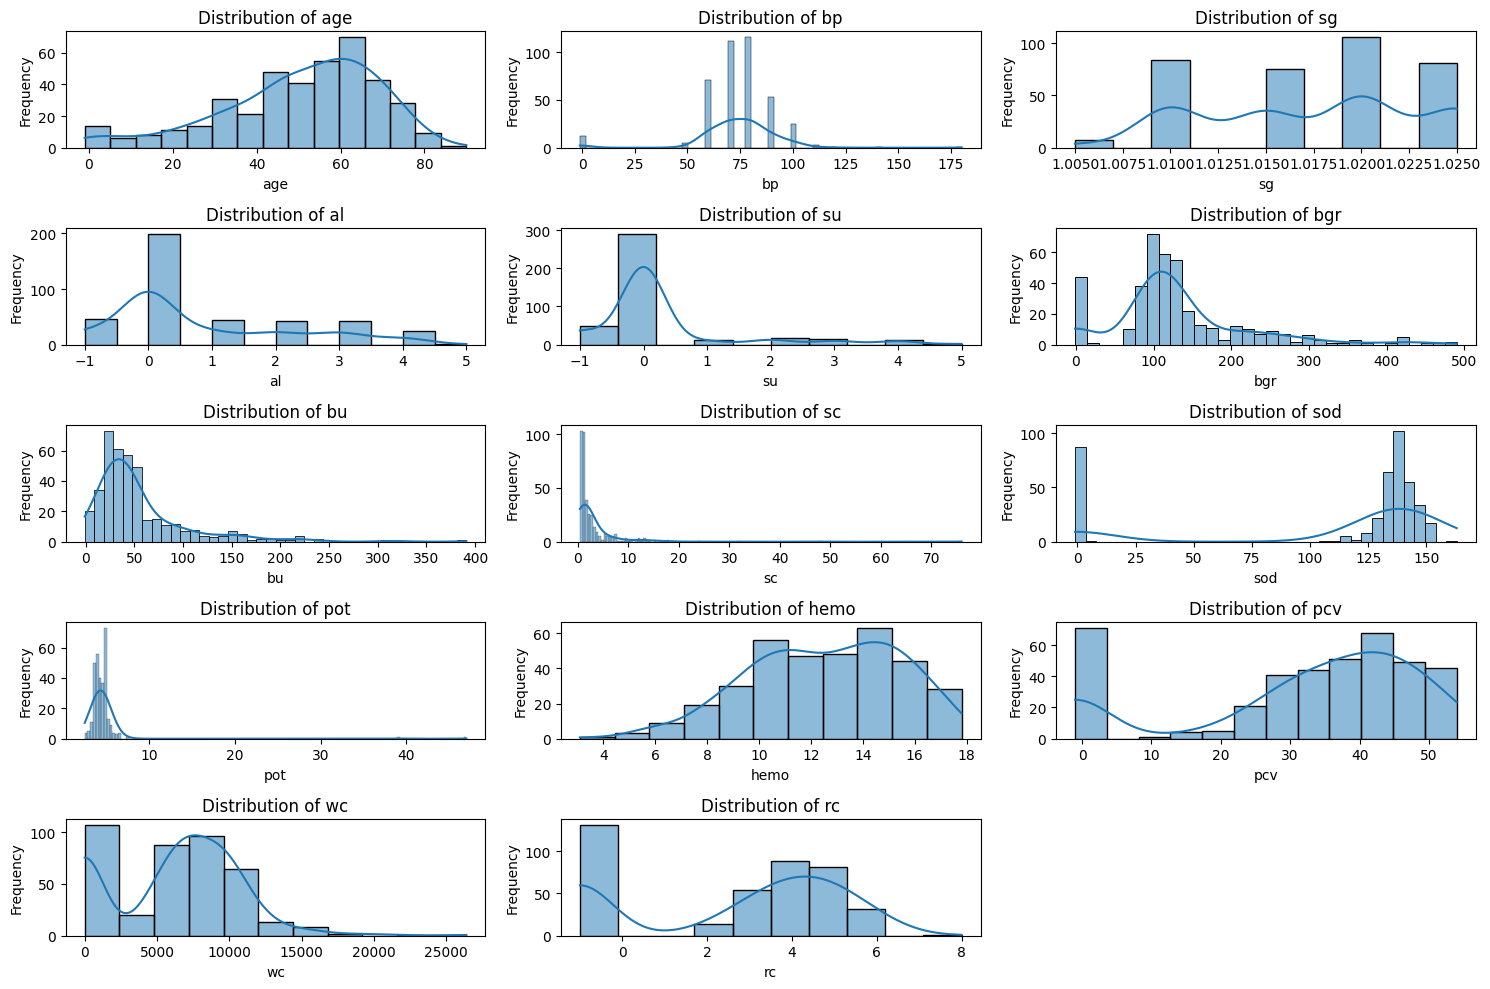

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for distplots
num_cols = col_numerically_df.columns
num_cols_count = len(num_cols)
num_subplot_cols = 3
num_subplot_rows = -(-num_cols_count // num_subplot_cols)  # Ceiling division

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, start=1):
    plt.subplot(num_subplot_rows, num_subplot_cols, i)
    sns.histplot(col_numerically_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

***EDA***

In [ ]:
# Checking for null values in the entire DataFrame
null_values = ckd_df.isnull().sum().sort_values(ascending=False)

# Displaying columns with their corresponding null value counts
print("Null Values in DataFrame:")
print(null_values)

Null Values in DataFrame:
rbc               152
pot                88
pc                 65
hemo               52
sg                 47
sc                 17
pcc                 4
ba                  4
cad                 2
dm                  2
htn                 2
ane                 1
pe                  1
appet               1
age                 0
rc                  0
sod                 0
wc                  0
pcv                 0
bp                  0
bu                  0
bgr                 0
su                  0
al                  0
classification      0
dtype: int64


In [ ]:
# Checking null values in numerical columns
null_values_numerical = col_numerically_df.isnull().sum().sort_values(ascending=False)

# Displaying null values in numerical columns
print("Null Values in Numerical Columns:")
print(null_values_numerical)



Null Values in Numerical Columns:
pot     88
hemo    52
sg      47
sc      17
age      0
bp       0
al       0
su       0
bgr      0
bu       0
sod      0
pcv      0
wc       0
rc       0
dtype: int64


In [ ]:
# Checking null values in categorical columns
null_values_categorical = col_categorically_df.isnull().sum()

# Displaying null values in categorical columns
print("\nNull Values in Categorical Columns:")
print(null_values_categorical)


Null Values in Categorical Columns:
rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


***Missing Value Treatment***

In [ ]:
def random_value_imputation(feature):
      random_sample = ckd_df[feature].dropna().sample(ckd_df[feature].isna().sum())
      random_sample.index = ckd_df[ckd_df[feature].isnull()].index
      ckd_df.loc[ckd_df[feature].isnull(), feature] = random_sample


def impute_mode(feature):
      mode = ckd_df[feature].mode()[0]
      ckd_df[feature] = ckd_df[feature].fillna(mode)

In [ ]:
# List of numerical columns
numerical_columns = col_numerically_df.columns

# Applying random value imputation function to each numerical column
for col in numerical_columns:
    random_value_imputation(col)

In [ ]:
# Check null value counts again
null_values_numerical_after = col_numerically_df.isnull().sum()

# Display updated null values in numerical columns
print("Null Values in Numerical Columns After Imputation:")
print(null_values_numerical_after)

Null Values in Numerical Columns After Imputation:
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64


In [ ]:
random_value_imputation('rbc')
random_value_imputation('pc')

for col in col_categorically_df:
    impute_mode(col)

In [ ]:
null_values_numerical_after = col_numerically_df.isnull().sum()

# Display updated null values in numerical columns
print("Null Values in Numerical Columns After Imputation:")
print(null_values_numerical_after)


Null Values in Numerical Columns After Imputation:
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64


In [ ]:
null_values_categorical_after = col_categorically_df.isnull().sum()

# Display updated null values in categorical columns
print("Null Values in Categorical Columns After Imputation:")
print(null_values_categorical_after)


Null Values in Categorical Columns After Imputation:
rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [ ]:
ckd_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,abnormal,normal,notpresent,notpresent,-1,...,38,6000,-1,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,-1,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4,no,no,no,good,no,no,ckd


In [ ]:
for col in col_categorically_df.columns:
    unique_values = col_categorically_df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")


Unique values in column 'rbc': ['normal' 'abnormal']
Unique values in column 'pc': ['normal' 'abnormal']
Unique values in column 'pcc': ['notpresent' 'present']
Unique values in column 'ba': ['notpresent' 'present']
Unique values in column 'htn': ['yes' 'no']
Unique values in column 'dm': ['yes' 'no']
Unique values in column 'cad': ['no' 'yes']
Unique values in column 'appet': ['good' 'poor']
Unique values in column 'pe': ['no' 'yes']
Unique values in column 'ane': ['no' 'yes']
Unique values in column 'classification': [0 'no']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding using .loc
for col in col_categorically_df.columns:
       ckd_df[col] = label_encoder.fit_transform(ckd_df[col])

# Display the updated DataFrame with label encoded categorical columns
ckd_df.head()


  # if you check properly after using sklearn label encoder, we can see that in rbc attribute abnormal and normal have been replaced with 0 and 1 values.
  # i.e.., all the string columns in the dataset have been converted into 0 and 1.


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,1,0,0,121,...,44,7800,5,1,4,1,0,0,0,0
1,7,50,1.020,4,0,0,1,0,0,-1,...,38,6000,-1,0,3,1,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,-1,0,4,1,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3,1,3,1,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4,0,3,1,0,0,0,0


Splitting Dataset into TrainingSet-TestingSet

In [ ]:
ind_col = [col for col in ckd_df.columns if col != 'classification']
dep_col = 'classification'

X = ckd_df[ind_col]
y = ckd_df[dep_col]


# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

***KNN Model for Classification***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already performed data preprocessing and split the data into X and y

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier instance
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy score
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", knn_accuracy)

# Calculate confusion matrix
knn_conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", knn_conf_matrix)

# Generate classification report
knn_class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", knn_class_report)


Accuracy Score: 0.7125

Confusion Matrix:
 [[29 23]
 [ 0 28]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.56      0.72        52
           2       0.55      1.00      0.71        28

    accuracy                           0.71        80
   macro avg       0.77      0.78      0.71        80
weighted avg       0.84      0.71      0.71        80



***Random Forest Classifier***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already performed data preprocessing and split the data into X and y

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)  # You can adjust n_estimators as needed

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", rf_accuracy)

# Calculate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", rf_conf_matrix)

# Generate classification report
rf_class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", rf_class_report)


Accuracy Score: 1.0
Confusion Matrix:
 [[78  0]
 [ 0 42]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        42

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



***Gradient Boosting Classifier***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already performed data preprocessing and split the data into X and y

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Create a GradientBoostingClassifier instance
gb_classifier = GradientBoostingClassifier(n_estimators=500, random_state=123)  # You can adjust n_estimators as needed    # 123, 42

# Train the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy score
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", gb_accuracy)

# Calculate confusion matrix
gb_conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", gb_conf_matrix)

# Generate classification report
gb_class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", gb_class_report)

Accuracy Score: 0.975
Confusion Matrix:
 [[77  1]
 [ 2 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        78
           2       0.98      0.95      0.96        42

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
# Arranging the accuracy scores for each model in descending order.

models = pd.DataFrame({
    'Model': ['KNN', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Score': [knn_accuracy, rf_accuracy, gb_accuracy]
})

sorted_models = models.sort_values(by='Score', ascending=False)
print(sorted_models)

                          Model   Score
1      Random Forest Classifier  1.0000
2  Gradient Boosting Classifier  0.9750
0                           KNN  0.7125
